# Feature importance analysis 

In [1]:
import shap 
import joblib 
import numpy as np 
from lightgbm import plot_importance, plot_tree, create_tree_digraph
import pandas as pd
from tqdm import tqdm 
import shap

import matplotlib.pyplot as plt
%matplotlib inline

from descriptornames import *

In [2]:
CHEMICAL_FEATURES = [
    "mc_CRY-chi-0-all",
    "mc_CRY-chi-1-all",
    "mc_CRY-chi-2-all",
    "mc_CRY-chi-3-all",
    "mc_CRY-Z-0-all",
    "mc_CRY-Z-1-all",
    "mc_CRY-Z-2-all",
    "mc_CRY-Z-3-all",
    "mc_CRY-I-1-all",
    "mc_CRY-I-2-all",
    "mc_CRY-I-3-all",
    "mc_CRY-T-0-all",
    "mc_CRY-T-1-all",
    "mc_CRY-T-2-all",
    "mc_CRY-T-3-all",
    "mc_CRY-S-0-all",
    "mc_CRY-S-1-all",
    "mc_CRY-S-2-all",
    "mc_CRY-S-3-all",
    "D_mc_CRY-chi-1-all",
    "D_mc_CRY-chi-2-all",
    "D_mc_CRY-chi-3-all",
    "D_mc_CRY-Z-1-all",
    "D_mc_CRY-Z-2-all",
    "D_mc_CRY-Z-3-all",
    "D_mc_CRY-T-1-all",
    "D_mc_CRY-T-2-all",
    "D_mc_CRY-T-3-all",
    "D_mc_CRY-S-1-all",
    "D_mc_CRY-S-2-all",
    "D_mc_CRY-S-3-all",
    "func-chi-0-all",
    "func-chi-1-all",
    "func-chi-2-all",
    "func-chi-3-all",
    "func-Z-0-all",
    "func-Z-1-all",
    "func-Z-2-all",
    "func-Z-3-all",
    "func-I-1-all",
    "func-I-2-all",
    "func-I-3-all",
    "func-T-0-all",
    "func-T-1-all",
    "func-T-2-all",
    "func-T-3-all",
    "func-S-0-all",
    "func-S-1-all",
    "func-S-2-all",
    "func-S-3-all",
    "func-alpha-0-all",
    "func-alpha-1-all",
    "func-alpha-2-all",
    "func-alpha-3-all",
    "D_func-chi-1-all",
    "D_func-chi-2-all",
    "D_func-chi-3-all",
    "D_func-Z-1-all",
    "D_func-Z-2-all",
    "D_func-Z-3-all",
    "D_func-T-1-all",
    "D_func-T-2-all",
    "D_func-T-3-all",
    "D_func-S-2-all",
    "D_func-S-3-all",
    "D_func-alpha-1-all",
    "D_func-alpha-2-all",
    "D_func-alpha-3-all",
    "f-lig-chi-0",
    "f-lig-chi-1",
    "f-lig-chi-2",
    "f-lig-chi-3",
    "f-lig-Z-0",
    "f-lig-Z-1",
    "f-lig-Z-2",
    "f-lig-Z-3",
    "f-lig-I-0",
    "f-lig-I-1",
    "f-lig-I-2",
    "f-lig-I-3",
    "f-lig-T-0",
    "f-lig-T-1",
    "f-lig-T-2",
    "f-lig-T-3",
    "f-lig-S-0",
    "f-lig-S-1",
    "f-lig-S-2",
    "f-lig-S-3",
    "lc-chi-0-all",
    "lc-chi-1-all",
    "lc-chi-2-all",
    "lc-chi-3-all",
    "lc-Z-0-all",
    "lc-Z-1-all",
    "lc-Z-2-all",
    "lc-Z-3-all",
    "lc-I-2-all",
    "lc-I-3-all",
    "lc-T-0-all",
    "lc-T-1-all",
    "lc-T-2-all",
    "lc-T-3-all",
    "lc-S-3-all",
    "lc-alpha-0-all",
    "lc-alpha-1-all",
    "lc-alpha-2-all",
    "lc-alpha-3-all",
    "D_lc-chi-2-all",
    "D_lc-chi-3-all",
    "D_lc-Z-1-all",
    "D_lc-Z-2-all",
    "D_lc-Z-3-all",
    "D_lc-T-1-all",
    "D_lc-T-2-all",
    "D_lc-T-3-all",
    "D_lc-alpha-1-all",
    "D_lc-alpha-2-all",
    "D_lc-alpha-3-all",
    "tertiary_amide_sum",
    "ester_sum",
    "carbonyl_sum",
    "logP_sum",
    "MR_sum",
    "aromatic_rings_sum",
    "dbonds_sum",
    "abonds_sum",
    "tertiary_amide_mean",
    "ester_mean",
    "carbonyl_mean",
    "logP_mean",
    "MR_mean",
    "aromatic_rings_mean",
    "dbonds_mean",
    "abonds_mean"]

In [5]:
model_median = joblib.load('../regressor_medianrun_2020_09_10_13_19_1599736778False.joblib')

In [6]:
X_test = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/X_test_run_2020_09_10_13_19_1599736778.npy')

In [7]:
X_train = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/X_train_run_2020_09_10_13_19_1599736778.npy')

In [8]:
y_test = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/y_test_run_2020_09_10_13_19_1599736778.npy')
y_train = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/y_train_run_2020_09_10_13_19_1599736778.npy')

## We need to select one colorchannel

In [9]:
booster = model_median.estimators_[0]

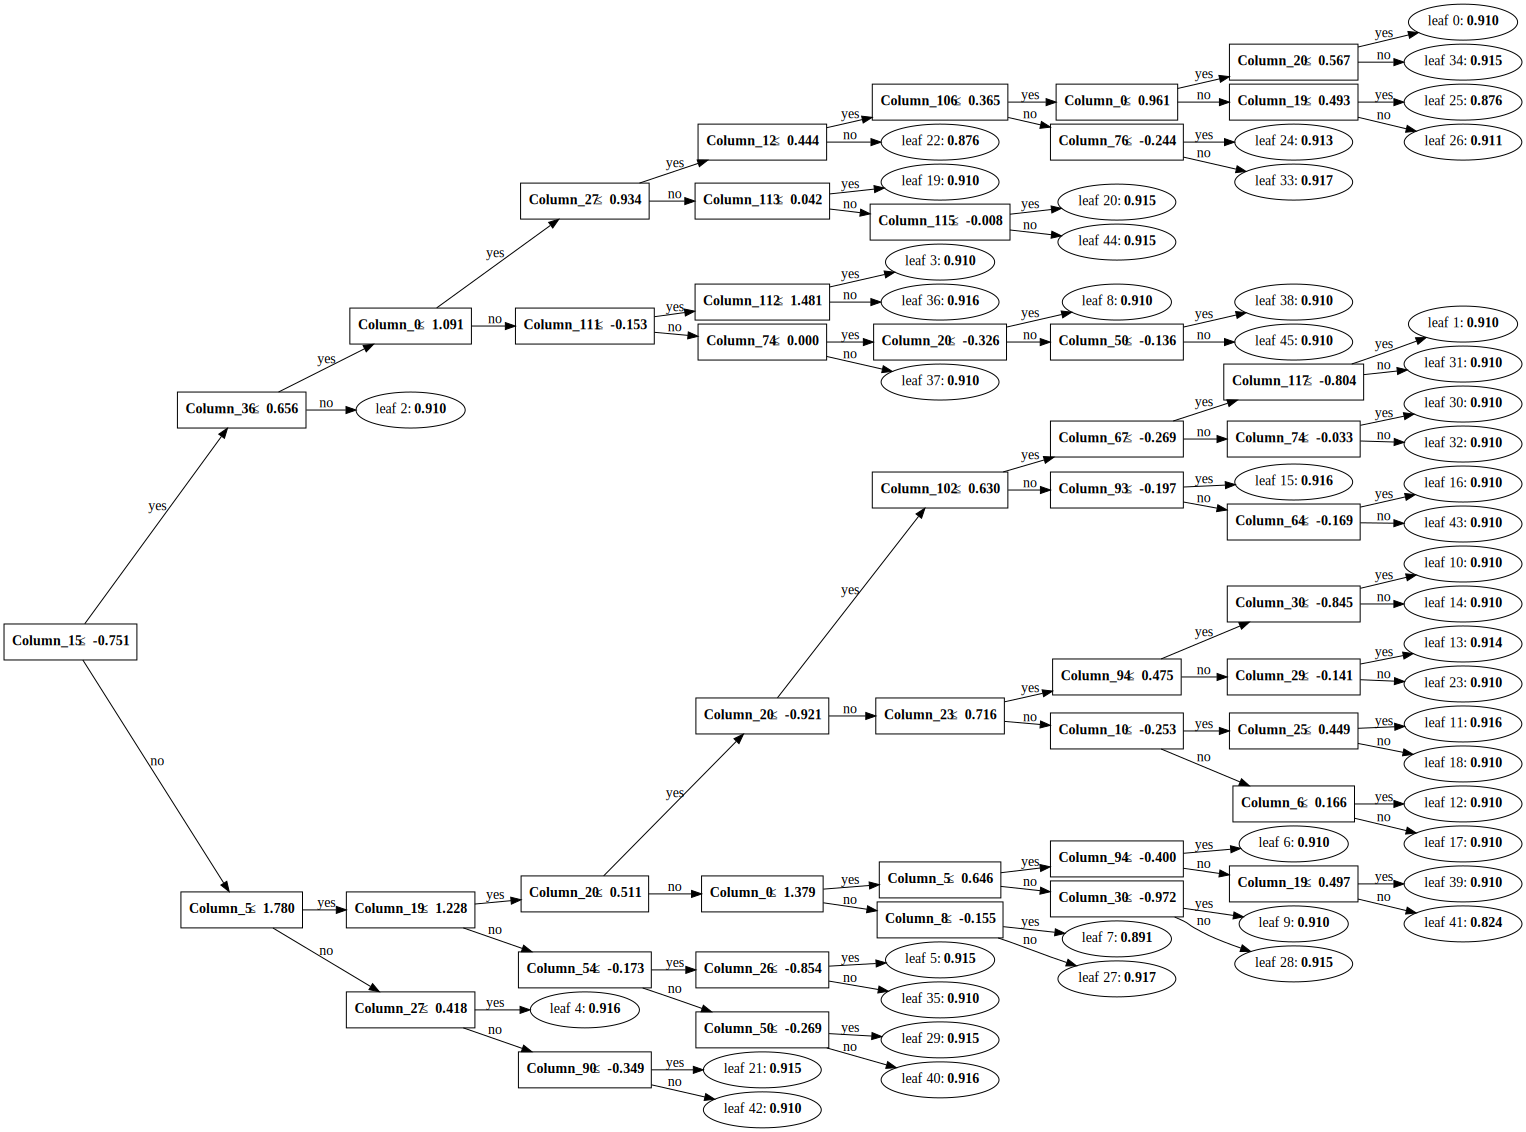

In [67]:
create_tree_digraph(booster)

In [10]:
feat_filtred_mc = []

feat_filtred_lc = []

feat_filtred_mc_indices = []

feat_filtred_lc_indices = []

for i, feat in enumerate(CHEMICAL_FEATURES):
    if feat in metalcenter_descriptors:
        feat_filtred_mc.append(feat)
        feat_filtred_mc_indices.append(i)
    elif feat in linker_descriptors or feat:
        feat_filtred_lc.append(feat)
        feat_filtred_lc_indices.append(i)
    elif feat in mol_desc: 
        feat_filtred_lc.append(feat)
        feat_filtred_lc_indices.append(i)
    elif feat in functionalgroup_descriptors: 
        feat_filtred_lc.append(feat)
        feat_filtred_lc_indices.append(i)
        

In [53]:

red_shap_values = []
green_shap_values = []
blue_shap_values = []

for estimator in model_median.estimators_:
    for i, channel in enumerate(estimator.estimators_): 
        explainer = shap.TreeExplainer(channel)
        shap_values = explainer.shap_values(X_train)
        
        if i == 0:
            red_shap_values.append(shap_values)
        if i == 1: 
            green_shap_values.append(shap_values)
        if i == 2:
            blue_shap_values.append(shap_values)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [68]:
shap_red = np.mean(red_shap_values, axis=0)
shap_green = np.mean(green_shap_values, axis=0)
shap_blue = np.mean(blue_shap_values, axis=0)

In [70]:
np.save('../results/shap_red.npy', shap_red)
np.save('../results/shap_green.npy', shap_green)
np.save('../results/shap_blue.npy', shap_blue)

In [107]:
np.savetxt('../results/shap_red.txt', shap_red)
np.savetxt('../results/shap_green.txt', shap_green)
np.savetxt('../results/shap_blue.txt', shap_blue)

In [14]:
np.save('../results/shap_red.npy', shap_values)

In [16]:
booster = model_median.estimators_[0].estimators_[1]
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_train)
#shap_interaction_values_green = explainer.shap_interaction_values(X_train)
np.save('../results/shap_green.npy', shap_values)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [17]:
booster = model_median.estimators_[0].estimators_[2]
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_train)
#shap_interaction_values_blue = explainer.shap_interaction_values(X_train)
np.save('../results/shap_blue.npy', shap_values)

In [18]:
shap_green = np.load('../results/shap_green.npy')
shap_red = np.load('../results/shap_red.npy')
shap_blue = np.load('../results/shap_blue.npy')

In [20]:
shap_red.shape

(3991, 134)

In [71]:
mc_importance = np.abs(shap_red[:,feat_filtred_mc_indices]).sum() 
lc_importance = np.abs(shap_red[:,feat_filtred_lc_indices]).sum()

print('metal importance {}, ligand importance {}. Ratio {}'.format(mc_importance, 
                                                                   lc_importance,
                                                                   mc_importance/lc_importance))

metal importance 1010.8190832872851, ligand importance 426.29879036505525. Ratio 2.371151657319233


In [72]:
mc_importance = np.abs(shap_green[:,feat_filtred_mc_indices]).sum() 
lc_importance = np.abs(shap_green[:,feat_filtred_lc_indices]).sum()

print('metal importance {}, ligand importance {}. Ratio {}'.format(mc_importance, 
                                                                   lc_importance,
                                                                   mc_importance/lc_importance))

metal importance 1525.8864807196533, ligand importance 578.4774285800983. Ratio 2.6377632131041273


In [73]:
mc_importance = np.abs(shap_blue[:,feat_filtred_mc_indices]).sum() 
lc_importance = np.abs(shap_blue[:,feat_filtred_lc_indices]).sum()

print('metal importance {}, ligand importance {}. Ratio {}'.format(mc_importance, 
                                                                   lc_importance,
                                                                   mc_importance/lc_importance))

metal importance 806.806438951255, ligand importance 1044.5114282448558. Ratio 0.7724247118166737


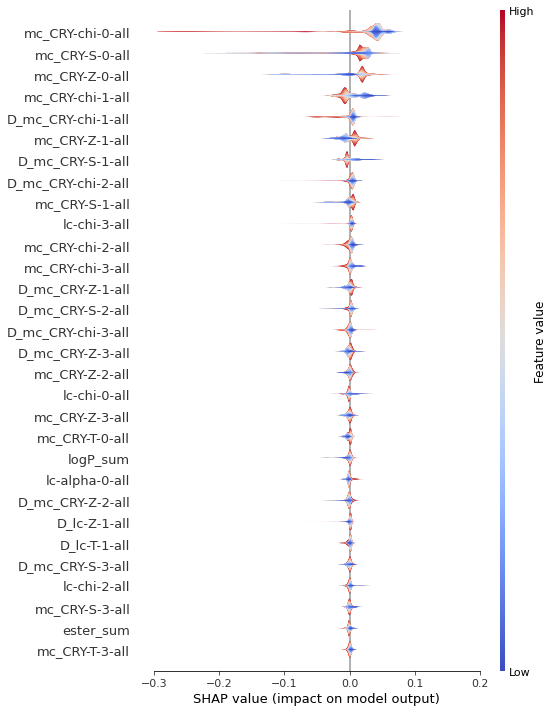

In [106]:
shap.summary_plot(shap_red, X_train, feature_names=CHEMICAL_FEATURES, plot_type='layered_violin', 
                  max_display=30, plot_size=(8,10), show=False, color='coolwarm')
plt.xlim(-.3,.2)
plt.tight_layout()
#plt.savefig('../results/shap_summary_red.pdf', bbox_inches='tight')

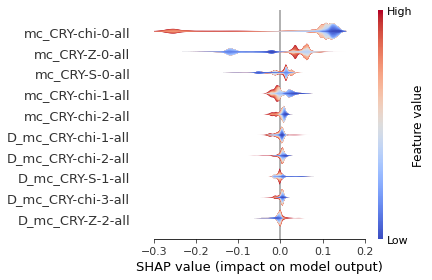

In [102]:
shap.summary_plot(shap_green, X_train, feature_names=CHEMICAL_FEATURES, 
                  plot_type='layered_violin', max_display=10, plot_size=(6,4), show=False, color='coolwarm')
plt.xlim(-.3,.2)
plt.tight_layout()

#plt.savefig('../results/shap_summary_green.pdf', bbox_inches='tight')

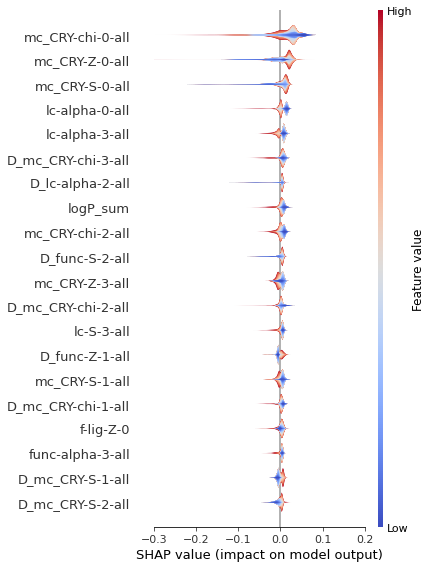

In [109]:
shap.summary_plot(shap_blue, X_train, feature_names=CHEMICAL_FEATURES, 
                  plot_type='layered_violin', max_display=20, plot_size=(6,8), show=False, color='coolwarm')
plt.xlim(-.3,.2)
plt.tight_layout()
#plt.savefig('../results/shap_summary_blue.pdf', bbox_inches='tight')

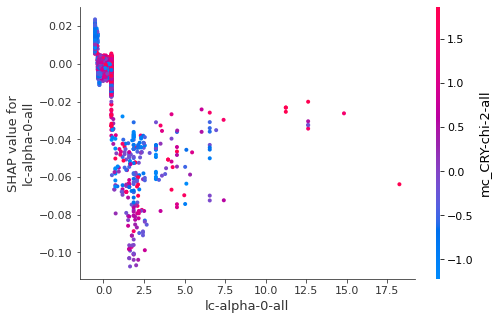

In [111]:
shap.dependence_plot('lc-alpha-0-all', shap_blue, X_train, feature_names=CHEMICAL_FEATURES)

In [143]:
def get_bootstrapped_shap_values(model, data, channel=0, samples=500, rounds=5000):
    booster = model.estimators_[channel]
    explainer = shap.TreeExplainer(booster)
    metal_importance = []
    ligand_importance = []
    shap_values = []

    for _ in tqdm(range(rounds)):
        indices = np.random.choice(np.arange(len(data)-1), samples, replace=True)
        shap_val = explainer.shap_values(data[indices])
        norm = np.abs(shap_val).sum(axis=0)
        
        mc_importance = np.abs(shap_val[:,feat_filtred_mc_indices]).sum(axis=0)  / norm[feat_filtred_mc_indices]
        lc_importance = np.abs(shap_val[:,feat_filtred_lc_indices]).sum(axis=0) / norm[feat_filtred_lc_indices]
        metal_importance.append(mc_importance.sum())
        ligand_importance.append(lc_importance.sum())

        shap_values.append(shap_val)
    
    return shap_values, metal_importance, ligand_importance

In [144]:
r_shap_vals, r_metal_importance, r_ligand_importance = get_bootstrapped_shap_values(model_median,
                                                                                    X_train, rounds=5)

100%|██████████| 5/5 [05:58<00:00, 71.63s/it]


In [57]:
df_importance_plot = pd.DataFrame(
    {
            'color': ['red'] * len(r_metal_importance) +  ['green'] * len(r_metal_importance) + ['blue'] * len(r_metal_importance),
            'metal importance': r_metal_importance + g_metal_importance + b_metal_importance,
            'ligand importance': r_ligand_importance + g_ligand_importance + b_ligand_importance,

    }
)

In [58]:
df_importance_plot['ratio'] = df_importance_plot['metal importance'] / df_importance_plot['ligand importance']

In [59]:
import seaborn as sns


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.

The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


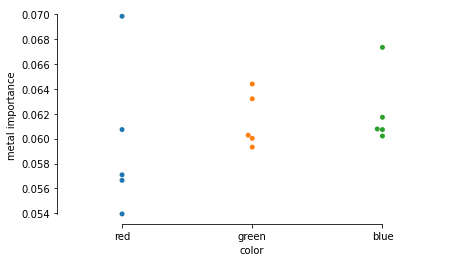

In [60]:
fig, ax = plt.subplots(figsize=(7,4))
sns.swarmplot(data=df_importance_plot, x='color', y='metal importance', ax=ax)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('../results/metal_importance_color_channel.pdf', bbox_inches='tight')


The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.

The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


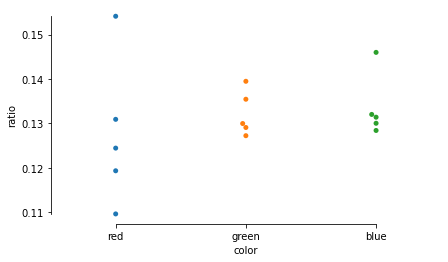

In [63]:
fig, ax = plt.subplots(figsize=(7,4))
sns.swarmplot(data=df_importance_plot, x='color', y='ratio', ax=ax)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('../results/metal_importance_color_channel.pdf', bbox_inches='tight')

## Analyze the bootsrapped results

In [132]:
lc_blue = np.load('../results/bootstrapped_shap/lc_blue.npy')
lc_green = np.load('../results/bootstrapped_shap/lc_green.npy')
lc_red = np.load('../results/bootstrapped_shap/lc_red.npy')


mc_blue = np.load('../results/bootstrapped_shap/mc_blue.npy')
mc_green = np.load('../results/bootstrapped_shap/mc_green.npy')
mc_red = np.load('../results/bootstrapped_shap/mc_red.npy')

In [136]:
mc_blue 

array([[  3.82686502,  88.39836361,  42.28917863, ..., 150.27845913,
        170.45197562,  56.81557421],
       [  3.2992626 ,  90.91811972,  35.75960041, ..., 220.73276868,
        135.15585292,  98.51254005],
       [  3.49414232,  70.81427719,  42.12365079, ..., 158.87591165,
        118.88933675,  79.23579335],
       ...,
       [  3.37824281,  72.22759633,  42.53611906, ..., 209.27227774,
        156.92921082, 105.03994351],
       [  3.54857211,  82.94108043,  42.27180533, ..., 201.11877068,
        191.47533349,  79.47233485],
       [  3.3489267 ,  78.67970089,  46.76714266, ..., 205.53173682,
        164.38198044,  66.70878866]])

In [69]:
df_dabest = pd.DataFrame(
    {
        'blue': mc_blue / lc_blue,
        'red':  mc_red / lc_red,
        'green': mc_green / lc_green,
    }
)

NameError: name 'mc_blue' is not defined

## Make some feature importance pies

In [77]:
feature_dict = {
    'metal': {
        'electronegativity': [
                'mc_CRY-chi-0-all',
                'mc_CRY-chi-1-all',
                'mc_CRY-chi-2-all',
                'mc_CRY-chi-3-all',
                'D_mc_CRY-chi-1-all',
                'D_mc_CRY-chi-2-all',
                'D_mc_CRY-chi-3-all',
                'sum-D_mc_CRY-chi-1-all',
                'sum-D_mc_CRY-chi-2-all',
                'sum-D_mc_CRY-chi-3-all',
                'sum-mc_CRY-chi-0-all',
                'sum-mc_CRY-chi-1-all',
                'sum-mc_CRY-chi-2-all',
                'sum-mc_CRY-chi-3-all',
        ],
        'atomic_number' : [
                'mc_CRY-Z-0-all',
                'mc_CRY-Z-1-all',
                'mc_CRY-Z-2-all',
                'mc_CRY-Z-3-all',
                'D_mc_CRY-Z-1-all',
                'D_mc_CRY-Z-2-all',
                'D_mc_CRY-Z-3-all',
                'sum-D_mc_CRY-Z-1-all',
                'sum-D_mc_CRY-Z-2-all',
                'sum-D_mc_CRY-Z-3-all',
                'sum-mc_CRY-Z-0-all',
                'sum-mc_CRY-Z-1-all',
                'sum-mc_CRY-Z-2-all',
                'sum-mc_CRY-Z-3-all',
        ],
        'identity': [
                'mc_CRY-I-1-all',
                'mc_CRY-I-2-all',
                'mc_CRY-I-3-all',
                'sum-mc_CRY-I-0-all',
                'sum-mc_CRY-I-1-all',
                'sum-mc_CRY-I-2-all',
                'sum-mc_CRY-I-3-all',
        ],
        'topology': [
                'mc_CRY-T-0-all',
                'mc_CRY-T-1-all',
                'mc_CRY-T-2-all',
                'mc_CRY-T-3-all',
                'D_mc_CRY-T-1-all',
                'D_mc_CRY-T-2-all',
                'D_mc_CRY-T-3-all',
                'sum-D_mc_CRY-T-1-all',
                'sum-D_mc_CRY-T-2-all',
                'sum-D_mc_CRY-T-3-all',
                'sum-mc_CRY-T-0-all',
                'sum-mc_CRY-T-1-all',
                'sum-mc_CRY-T-2-all',
                'sum-mc_CRY-T-3-all',

        ],
        'covalent_radius': [
                'mc_CRY-S-0-all',
                'mc_CRY-S-1-all',
                'mc_CRY-S-2-all',
                'mc_CRY-S-3-all',
                'D_mc_CRY-S-1-all',
                'D_mc_CRY-S-2-all',
                'D_mc_CRY-S-3-all',
                'sum-D_mc_CRY-S-1-all',
                'sum-D_mc_CRY-S-2-all',
                'sum-D_mc_CRY-S-3-all',
                'sum-mc_CRY-S-1-all',
                'sum-mc_CRY-S-2-all',
                'sum-mc_CRY-S-3-all',
                'sum-mc_CRY-S-0-all',
        ]
        
    },
    'ligand': {
        'electronegativity': [
                'func-chi-0-all',
                'func-chi-1-all',
                'func-chi-2-all',
                'func-chi-3-all',
                'D_func-chi-1-all',
                'D_func-chi-2-all',
                'D_func-chi-3-all',
                'f-lig-chi-0',
                'f-lig-chi-1',
                'f-lig-chi-2',
                'f-lig-chi-3',
                'lc-chi-0-all',
                'lc-chi-1-all',
                'lc-chi-2-all',
                'lc-chi-3-all',
                'D_lc-chi-2-all',
                'D_lc-chi-3-all',
                'sum-func-chi-0-all',
                'sum-func-chi-1-all',
                'sum-func-chi-2-all',
                'sum-func-chi-3-all',
                'sum-D_func-chi-1-all',
                'sum-D_func-chi-2-all',
                'sum-D_func-chi-3-all',
                'sum-f-lig-chi-0',
                'sum-f-lig-chi-1',
                'sum-f-lig-chi-2',
                'sum-f-lig-chi-3',
                'sum-D_lc-chi-1-all',
                'sum-D_lc-chi-2-all',
                'sum-D_lc-chi-3-all',
                'sum-lc-chi-0-all',
                'sum-lc-chi-1-all',
                'sum-lc-chi-2-all',
                'sum-lc-chi-3-all',
        ],
        'atomic_number': [
                'func-Z-0-all',
                'func-Z-1-all',
                'func-Z-2-all',
                'func-Z-3-all',
                'D_func-Z-1-all',
                'D_func-Z-2-all',
                'D_func-Z-3-all',
                'f-lig-Z-0',
                'f-lig-Z-1',
                'f-lig-Z-2',
                'f-lig-Z-3',
                'lc-Z-0-all',
                'lc-Z-1-all',
                'lc-Z-2-all',
                'lc-Z-3-all',
                'D_lc-Z-1-all',
                'D_lc-Z-2-all',
                'D_lc-Z-3-all',
                'sum-func-Z-0-all',
                'sum-func-Z-1-all',
                'sum-func-Z-2-all',
                'sum-func-Z-3-all',
                'sum-D_func-Z-1-all',
                'sum-D_func-Z-2-all',
                'sum-D_func-Z-3-all',
                'sum-f-lig-Z-0',
                'sum-f-lig-Z-1',
                'sum-f-lig-Z-2',
                'sum-f-lig-Z-3',
                'sum-D_lc-Z-1-all',
                'sum-D_lc-Z-2-all',
                'sum-D_lc-Z-3-all',
                'sum-lc-Z-0-all',
                'sum-lc-Z-1-all',
                'sum-lc-Z-2-all',
                'sum-lc-Z-3-all',
        ],
        'identity': [
                'func-I-1-all',
                'func-I-2-all',
                'func-I-3-all',
                'f-lig-I-0',
                'f-lig-I-1',
                'f-lig-I-2',
                'f-lig-I-3',
                'lc-I-2-all',
                'lc-I-3-all',
                'sum-func-I-0-all',
                'sum-func-I-1-all',
                'sum-func-I-2-all',
                'sum-func-I-3-all',
                'sum-f-lig-I-0',
                'sum-f-lig-I-1',
                'sum-f-lig-I-2',
                'sum-f-lig-I-3',
                'sum-lc-I-0-all',
                'sum-lc-I-1-all',
                'sum-lc-I-2-all',
                'sum-lc-I-3-all',
        ],
        'topology': [
                'func-T-0-all',
                'func-T-1-all',
                'func-T-2-all',
                'func-T-3-all',
                'D_func-T-1-all',
                'D_func-T-2-all',
                'D_func-T-3-all',
                'f-lig-T-0',
                'f-lig-T-1',
                'f-lig-T-2',
                'f-lig-T-3',
                'lc-T-0-all',
                'lc-T-1-all',
                'lc-T-2-all',
                'lc-T-3-all',
                'D_lc-T-1-all',
                'D_lc-T-2-all',
                'D_lc-T-3-all',
                'sum-func-T-0-all',
                'sum-func-T-1-all',
                'sum-func-T-2-all',
                'sum-func-T-3-all',
                'sum-D_func-T-1-all',
                'sum-D_func-T-2-all',
                'sum-D_func-T-3-all',
                'sum-D_lc-T-1-all',
                'sum-D_lc-T-2-all',
                'sum-D_lc-T-3-all',
                'sum-f-lig-T-0',
                'sum-f-lig-T-1',
                'sum-f-lig-T-2',
                'sum-f-lig-T-3',
                'sum-lc-T-0-all',
                'sum-lc-T-1-all',
                'sum-lc-T-2-all',
                'sum-lc-T-3-all',
        ],
        'covalent_radius': [
                'func-S-0-all',
                'func-S-1-all',
                'func-S-2-all',
                'func-S-3-all',
                'D_func-S-2-all',
                'D_func-S-3-all',
                'f-lig-S-0',
                'f-lig-S-1',
                'f-lig-S-2',
                'f-lig-S-3',
                'lc-S-3-all',
                'sum-func-S-0-all',
                'sum-func-S-1-all',
                'sum-func-S-2-all',
                'sum-func-S-3-all',
                'sum-D_func-S-1-all',
                'sum-D_func-S-2-all',
                'sum-D_func-S-3-all',
                'sum-D_lc-S-1-all',
                'sum-D_lc-S-2-all',
                'sum-D_lc-S-3-all',
                'sum-f-lig-S-0',
                'sum-f-lig-S-1',
                'sum-f-lig-S-2',
                'sum-f-lig-S-3',
                'sum-lc-S-0-all',
                'sum-lc-S-1-all',
                'sum-lc-S-2-all',
                'sum-lc-S-3-all',
        ],
        'polarizability': [
                'func-alpha-0-all',
                'func-alpha-1-all',
                'func-alpha-2-all',
                'func-alpha-3-all',
                'D_func-alpha-1-all',
                'D_func-alpha-2-all',
                'D_func-alpha-3-all',
                'lc-alpha-0-all',
                'lc-alpha-1-all',
                'lc-alpha-2-all',
                'lc-alpha-3-all',
                'D_lc-alpha-1-all',
                'D_lc-alpha-2-all',
                'D_lc-alpha-3-all',
                'sum-func-alpha-0-all',
                'sum-func-alpha-1-all',
                'sum-func-alpha-2-all',
                'sum-func-alpha-3-all',
                'sum-D_func-alpha-1-all',
                'sum-D_func-alpha-2-all',
                'sum-D_func-alpha-3-all',
                'sum-D_lc-alpha-1-all',
                'sum-D_lc-alpha-2-all',
                'sum-D_lc-alpha-3-all',
                'sum-lc-alpha-0-all',
                'sum-lc-alpha-1-all',
                'sum-lc-alpha-2-all',
                'sum-lc-alpha-3-all',
        ],
        
        'double_bonds': [
                'dbonds_sum',
                'dbonds_mean',
        ],
        'aromatic_bonds': [
                'aromatic_rings_sum',
                'abonds_mean',
                'abonds_sum',
                'aromatic_rings_mean',
        ],
        'functional_groups': [
                'tertiary_amide_sum',
                'ester_sum',
                'carbonyl_sum',
                'tertiary_amide_mean',
                'ester_mean',
                'carbonyl_mean',
        ],
        'MR': [
                'MR_mean',
                'MR_sum',
        ],
        'logP': [
                'logP_sum',
                'logP_mean',
        ]
        
    }
}

In [78]:
np.where(np.array(CHEMICAL_FEATURES) == 'logP_mean')[0][0]

129

In [79]:
feature_index_dict = {}
cfa = np.array(CHEMICAL_FEATURES)
for group, d in feature_dict.items():
    temp = {}
    for feature, keys in d.items():
        l = []
        for f in keys:
            if 'sum-' not in f:
                l.append(np.where(cfa == f)[0][0])
        temp[feature] = l
    feature_index_dict[group] = temp
    

In [80]:
indices_all = []

for group, d in feature_index_dict.items():
    for feature, keys in d.items():
        indices_all.extend(keys)

In [81]:
names_all = []

for group, d in feature_dict.items():
    for feature, keys in d.items():
        names_all.extend(keys)

In [82]:
s_blue = np.abs(shap_blue).sum(axis=0)

In [83]:
s_red = np.abs(shap_red).sum(axis=0)

In [84]:
s_green = np.abs(shap_green).sum(axis=0)

In [85]:
def summarize_imp(array): 
    summarized_importance = []
    sorted_labels = []
    for group, d in feature_index_dict.items():
        group_importance = []
        labels = np.array([ k for k in feature_dict[group].keys()])
        for feature, indices in d.items():
            importance = np.abs(array[indices]).sum()
            group_importance.append(importance)
        
        group_importance = np.array(group_importance)
        arr1inds = group_importance.argsort()
        
        importance = list(group_importance[arr1inds[::-1]])
        labels = list(labels[arr1inds[::-1]])
        
        summarized_importance.extend(importance)
        sorted_labels.extend(labels)
    
    return summarized_importance, sorted_labels

In [86]:
importance_blue, labels_blue = summarize_imp(s_blue)
importance_red, labels_red = summarize_imp(s_red)
importance_green, labels_green = summarize_imp(s_green)

In [87]:
palette = ["#1b9e77", "#d95f02", "#7570b3"]

In [88]:
from matplotlib.colors import hex2color

In [89]:
hex2color(palette[0])

(0.10588235294117647, 0.6196078431372549, 0.4666666666666667)

In [90]:
plot_labels = []
colors = []
counter = 0
for g, d in feature_dict.items():
    alpha = 1
    alpha_counter = 0
    c = hex2color(palette[counter])
    base_color = [c[0], c[1], c[2], 0]
    alpha_range = 0.8
    alpha_step = alpha_range / len(d)
    for k, v in d.items():
        plot_labels.append(g + ' ' + k)
        new_c = base_color.copy()
        new_c[3] = alpha - alpha_counter * alpha_step
        colors.append(new_c)
        alpha_counter += 1
    counter+=1

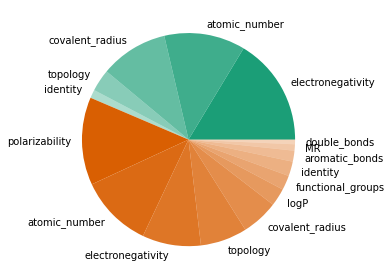

In [91]:
plt.pie(importance_blue, labels=labels_blue, colors=colors)
plt.tight_layout()
plt.savefig('../results/shap_blue_pie.pdf', bbox_inches='tight')

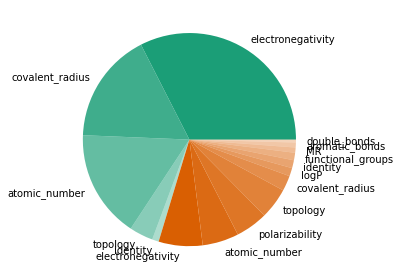

In [92]:
plt.pie(importance_red, labels=labels_red, colors=colors)
plt.tight_layout()
plt.savefig('../results/shap_red_pie.pdf', bbox_inches='tight')

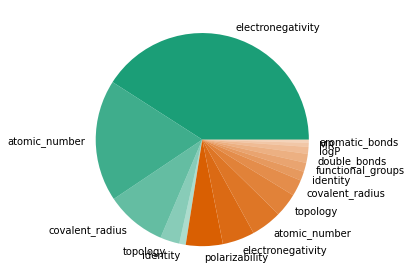

In [93]:
plt.pie(importance_green, labels=labels_green, colors=colors)
plt.tight_layout()
plt.savefig('../results/shap_green_pie.pdf', bbox_inches='tight')

In [14]:
interaction_0 = np.mean(np.load('../results/shap_interaction_0.npy'), axis=0)

In [15]:
interaction_1 = np.mean(np.load('../results/shap_interaction_1.npy'), axis=0)

In [16]:
interaction_2 = np.mean(np.load('../results/shap_interaction_2.npy'), axis=0)

In [31]:
np.save('../results/interaction_red_averaged.npy', interaction_0)
np.save('../results/interaction_green_averaged.npy', interaction_1)
np.save('../results/interaction_blue_averaged.npy', interaction_2)

In [17]:
x0 = np.load('../results/samples_0.npy')
x1 = np.load('../results/samples_1.npy')
x2 = np.load('../results/samples_2.npy')

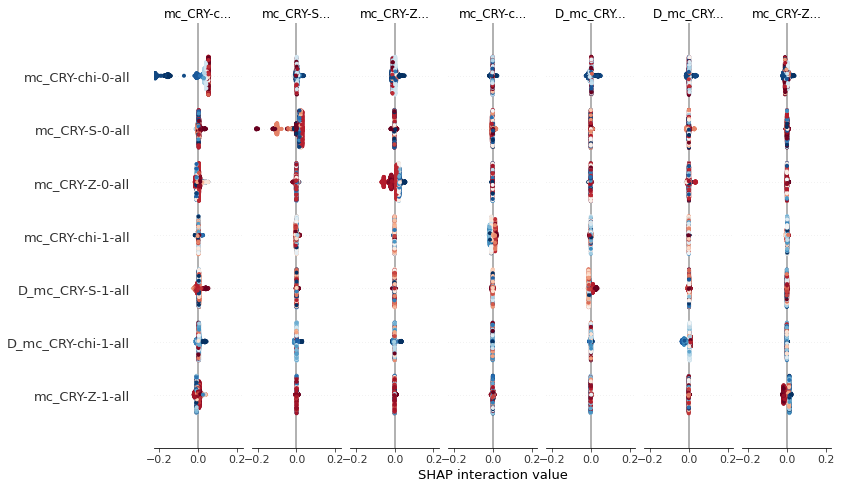

In [18]:
shap.summary_plot(interaction_0, x0, feature_names=np.array(CHEMICAL_FEATURES), plot_type='layered_violin')

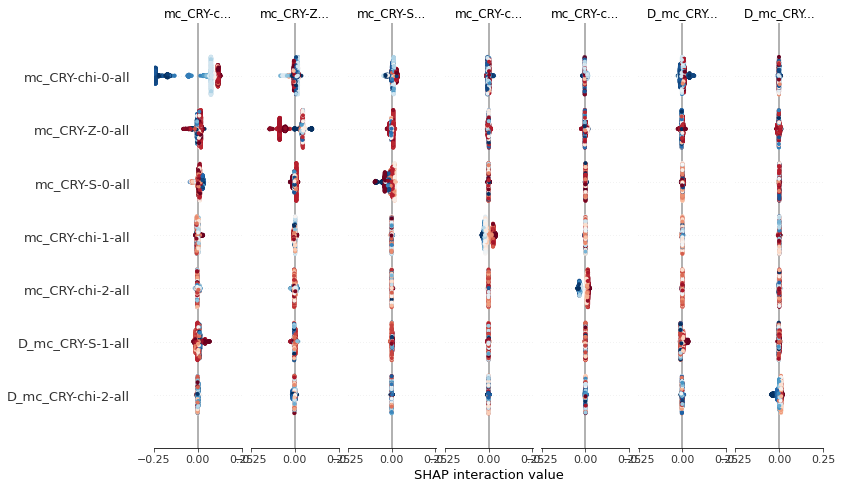

In [19]:
shap.summary_plot(interaction_1, x1, feature_names=np.array(CHEMICAL_FEATURES), plot_type='layered_violin')

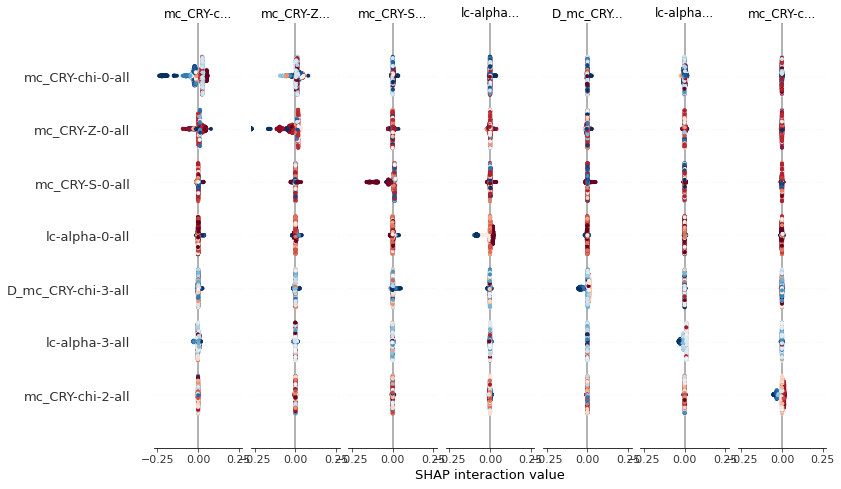

In [20]:
shap.summary_plot(interaction_2, x2, feature_names=np.array(CHEMICAL_FEATURES))

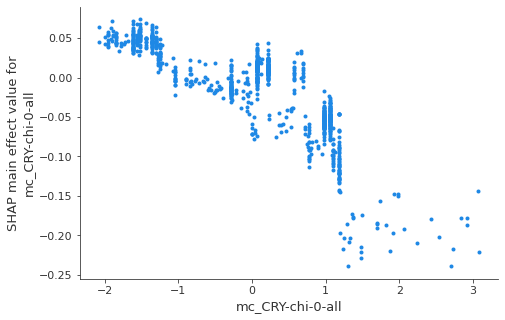

In [177]:
shap.dependence_plot(
    ("mc_CRY-chi-0-all", "mc_CRY-chi-0-all"),
    interaction_2,x2,
    feature_names=np.array(CHEMICAL_FEATURES)
)

divide by zero encountered in log


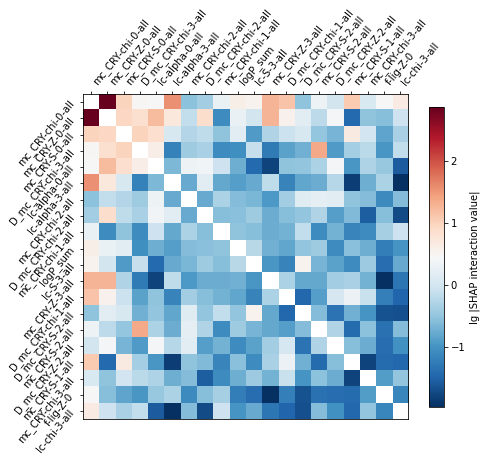

In [26]:
tmp = np.abs(interaction_2).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:20]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(7,7))
plt.imshow(np.log(tmp2), cmap='RdBu_r')
plt.yticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="left")
plt.gca().xaxis.tick_top()
plt.colorbar(shrink=.7, label='lg |SHAP interaction value|')
plt.tight_layout()
plt.savefig('shap_interactions_b.pdf', bbox_inches='tight')

divide by zero encountered in log


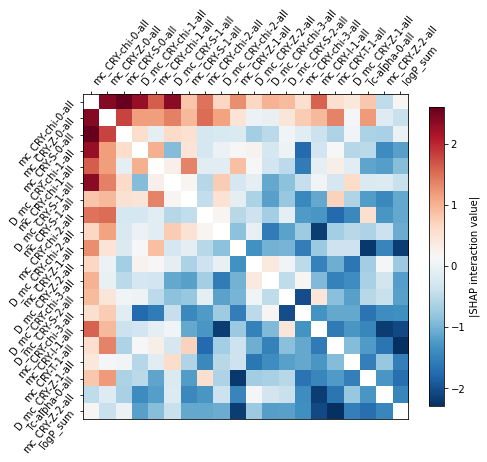

In [27]:
tmp = np.abs(interaction_1).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:20]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(7,7))
plt.imshow(np.log(tmp2), cmap='RdBu_r')
plt.yticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="left")
plt.gca().xaxis.tick_top()
plt.colorbar(shrink=.7, label='|SHAP interaction value|')
plt.tight_layout()
plt.savefig('shap_interactions_g.pdf', bbox_inches='tight')

divide by zero encountered in log


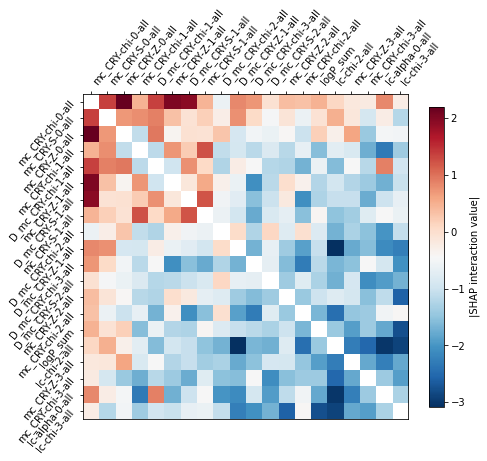

In [28]:
tmp = np.abs(interaction_0).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:20]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(7,7))
plt.imshow(np.log(tmp2), cmap='RdBu_r')
plt.yticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), np.array(CHEMICAL_FEATURES)[inds], rotation=50.4, horizontalalignment="left")
plt.gca().xaxis.tick_top()
plt.colorbar(shrink=.7, label='|SHAP interaction value|')
plt.tight_layout()
plt.savefig('shap_interactions_r.pdf', bbox_inches='tight')